# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from trading import EMA, EMA_trading_strategy, assessTradingStrategy
import matplotlib.pyplot as plt

# Import Data

In [2]:
df1 = pd.read_csv("data/BSE.NS.csv")
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-03,1085.0,1200.000000,1065.099976,1069.199951,939.741760,15771762
1,2017-02-06,1081.0,1087.800049,1023.099976,1029.199951,904.584900,2199600
2,2017-02-07,1030.0,1035.949951,1001.299988,1006.799988,884.897095,1294146
3,2017-02-08,1013.0,1034.849976,998.700012,1022.599976,898.784058,1187116
4,2017-02-09,1025.0,1028.699951,1007.150024,1010.049988,887.753662,466684
...,...,...,...,...,...,...,...
1660,2023-10-23,1640.0,1798.000000,1632.800049,1707.150024,1707.150024,7114067
1661,2023-10-25,1750.0,1828.000000,1695.099976,1788.699951,1788.699951,4826023
1662,2023-10-26,1770.0,1829.750000,1586.150024,1799.199951,1799.199951,6510271
1663,2023-10-27,1849.0,1912.800049,1841.050049,1862.949951,1862.949951,2991288


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1665 non-null   object 
 1   Open       1665 non-null   float64
 2   High       1665 non-null   float64
 3   Low        1665 non-null   float64
 4   Close      1665 non-null   float64
 5   Adj Close  1665 non-null   float64
 6   Volume     1665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 91.2+ KB


# Data Cleansing / Preparation

In [4]:
# convert Date column to datetime dtype
df1["Date"] = pd.to_datetime(df1["Date"])
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-03,1085.0,1200.000000,1065.099976,1069.199951,939.741760,15771762
1,2017-02-06,1081.0,1087.800049,1023.099976,1029.199951,904.584900,2199600
2,2017-02-07,1030.0,1035.949951,1001.299988,1006.799988,884.897095,1294146
3,2017-02-08,1013.0,1034.849976,998.700012,1022.599976,898.784058,1187116
4,2017-02-09,1025.0,1028.699951,1007.150024,1010.049988,887.753662,466684
...,...,...,...,...,...,...,...
1660,2023-10-23,1640.0,1798.000000,1632.800049,1707.150024,1707.150024,7114067
1661,2023-10-25,1750.0,1828.000000,1695.099976,1788.699951,1788.699951,4826023
1662,2023-10-26,1770.0,1829.750000,1586.150024,1799.199951,1799.199951,6510271
1663,2023-10-27,1849.0,1912.800049,1841.050049,1862.949951,1862.949951,2991288


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1665 non-null   datetime64[ns]
 1   Open       1665 non-null   float64       
 2   High       1665 non-null   float64       
 3   Low        1665 non-null   float64       
 4   Close      1665 non-null   float64       
 5   Adj Close  1665 non-null   float64       
 6   Volume     1665 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 91.2 KB


In [6]:
# add 5-day, 21-day, and 55-day EMAs
df2 = EMA(df1, "Close", 5)
df2

C:\Users\Jonathon\Desktop\Trading\trading.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[f'{numPeriods}_period_EMA'][i] = np.sum(dfCopy[closeCol][i-(numPeriods-1):i+1])/numPeriods
C:\Users\Jonathon\Desktop\Trading\trading.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[f'{numPeriods}_period_EMA'][i] = dfCopy[closeCol][i] * k + dfCopy[f'{numPeriods}_period_EMA'][i-1] * (1 - k)


,Date,Open,High,Low,Close,Adj Close,Volume,5_period_EMA
0,2017-02-03,1085.0,1200.000000,1065.099976,1069.199951,939.741760,15771762,NaN
1,2017-02-06,1081.0,1087.800049,1023.099976,1029.199951,904.584900,2199600,NaN
2,2017-02-07,1030.0,1035.949951,1001.299988,1006.799988,884.897095,1294146,NaN
3,2017-02-08,1013.0,1034.849976,998.700012,1022.599976,898.784058,1187116,NaN
4,2017-02-09,1025.0,1028.699951,1007.150024,1010.049988,887.753662,466684,1027.569971
...,...,...,...,...,...,...,...,...
1660,2023-10-23,1640.0,1798.000000,1632.800049,1707.150024,1707.150024,7114067,1586.378327
1661,2023-10-25,1750.0,1828.000000,1695.099976,1788.699951,1788.699951,4826023,1653.818869
1662,2023-10-26,1770.0,1829.750000,1586.150024,1799.199951,1799.199951,6510271,1702.279229
1663,2023-10-27,1849.0,1912.800049,1841.050049,1862.949951,1862.949951,2991288,1755.836137


In [7]:
df3 = EMA(df2, "Close", 21)
df3

C:\Users\Jonathon\Desktop\Trading\trading.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[f'{numPeriods}_period_EMA'][i] = np.sum(dfCopy[closeCol][i-(numPeriods-1):i+1])/numPeriods
C:\Users\Jonathon\Desktop\Trading\trading.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[f'{numPeriods}_period_EMA'][i] = dfCopy[closeCol][i] * k + dfCopy[f'{numPeriods}_period_EMA'][i-1] * (1 - k)


,Date,Open,High,Low,Close,Adj Close,Volume,5_period_EMA,21_period_EMA
0,2017-02-03,1085.0,1200.000000,1065.099976,1069.199951,939.741760,15771762,NaN,NaN
1,2017-02-06,1081.0,1087.800049,1023.099976,1029.199951,904.584900,2199600,NaN,NaN
2,2017-02-07,1030.0,1035.949951,1001.299988,1006.799988,884.897095,1294146,NaN,NaN
3,2017-02-08,1013.0,1034.849976,998.700012,1022.599976,898.784058,1187116,NaN,NaN
4,2017-02-09,1025.0,1028.699951,1007.150024,1010.049988,887.753662,466684,1027.569971,NaN
...,...,...,...,...,...,...,...,...,...
1660,2023-10-23,1640.0,1798.000000,1632.800049,1707.150024,1707.150024,7114067,1586.378327,1426.764788
1661,2023-10-25,1750.0,1828.000000,1695.099976,1788.699951,1788.699951,4826023,1653.818869,1459.667984
1662,2023-10-26,1770.0,1829.750000,1586.150024,1799.199951,1799.199951,6510271,1702.279229,1490.534527
1663,2023-10-27,1849.0,1912.800049,1841.050049,1862.949951,1862.949951,2991288,1755.836137,1524.390475


In [8]:
df4 = EMA(df3, "Close", 55)
df4

C:\Users\Jonathon\Desktop\Trading\trading.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[f'{numPeriods}_period_EMA'][i] = np.sum(dfCopy[closeCol][i-(numPeriods-1):i+1])/numPeriods
C:\Users\Jonathon\Desktop\Trading\trading.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy[f'{numPeriods}_period_EMA'][i] = dfCopy[closeCol][i] * k + dfCopy[f'{numPeriods}_period_EMA'][i-1] * (1 - k)


,Date,Open,High,Low,Close,Adj Close,Volume,5_period_EMA,21_period_EMA,55_period_EMA
0,2017-02-03,1085.0,1200.000000,1065.099976,1069.199951,939.741760,15771762,NaN,NaN,NaN
1,2017-02-06,1081.0,1087.800049,1023.099976,1029.199951,904.584900,2199600,NaN,NaN,NaN
2,2017-02-07,1030.0,1035.949951,1001.299988,1006.799988,884.897095,1294146,NaN,NaN,NaN
3,2017-02-08,1013.0,1034.849976,998.700012,1022.599976,898.784058,1187116,NaN,NaN,NaN
4,2017-02-09,1025.0,1028.699951,1007.150024,1010.049988,887.753662,466684,1027.569971,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1660,2023-10-23,1640.0,1798.000000,1632.800049,1707.150024,1707.150024,7114067,1586.378327,1426.764788,1215.364672
1661,2023-10-25,1750.0,1828.000000,1695.099976,1788.699951,1788.699951,4826023,1653.818869,1459.667984,1235.840932
1662,2023-10-26,1770.0,1829.750000,1586.150024,1799.199951,1799.199951,6510271,1702.279229,1490.534527,1255.960897
1663,2023-10-27,1849.0,1912.800049,1841.050049,1862.949951,1862.949951,2991288,1755.836137,1524.390475,1277.639077


# Exploratory Data Analysis / Data Viz

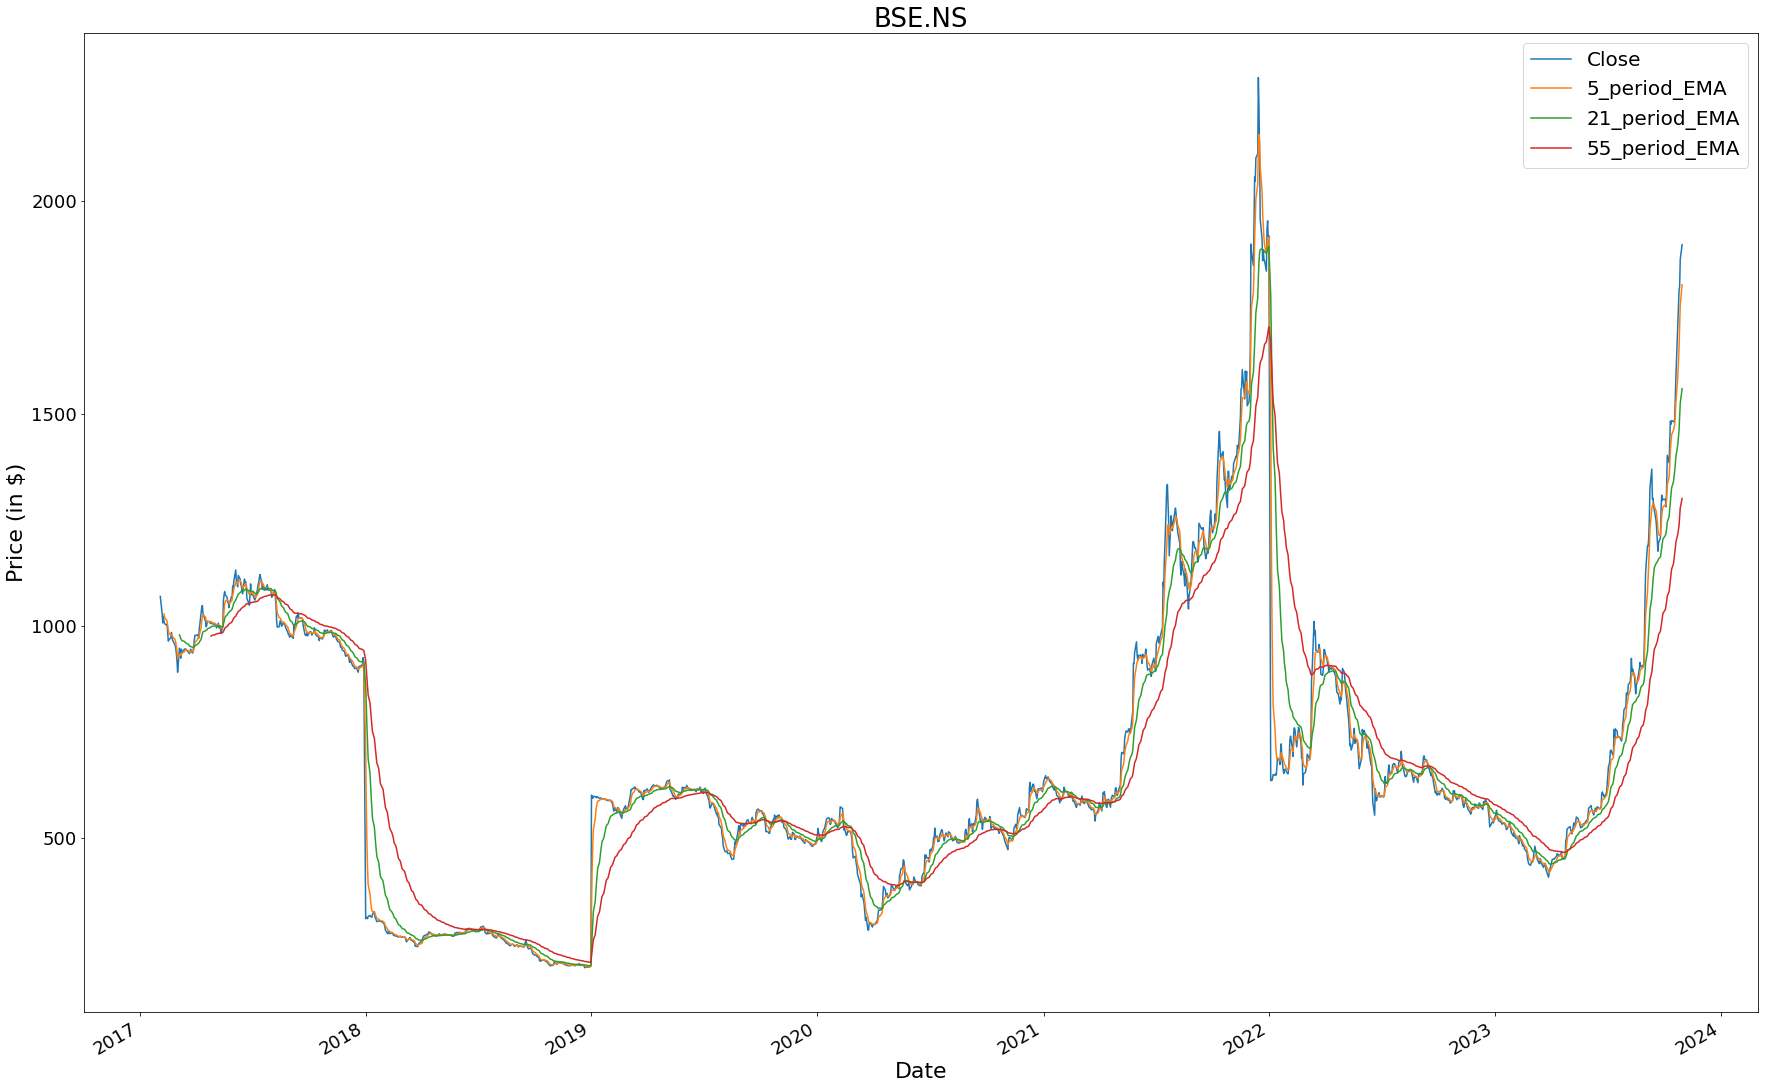

In [9]:
# plot Close vs. 5-day EMA vs. 21-day EMA vs. 55-day EMA
ax = df4.plot.line(x="Date", y=["Close", "5_period_EMA", "21_period_EMA", "55_period_EMA"], figsize=[30,20], title="BSE.NS", fontsize=18)
ax.title.set_size(26)
ax.set_xlabel('Date',fontdict={'fontsize':22})
ax.set_ylabel('Price (in $)',fontdict={'fontsize':22})
ax.legend(fontsize=20)
plt.show()

# Analysis

In [10]:
# compute Buy/sell signals of this trading strategy
df5 = EMA_trading_strategy(df4, "5_period_EMA", "21_period_EMA", "55_period_EMA")
df5

C:\Users\Jonathon\Desktop\Trading\trading.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy['Buy_Sell_Signal'][i] = 'BUY'
C:\Users\Jonathon\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Open,High,Low,Close,Adj Close,Volume,5_period_EMA,21_period_EMA,55_period_EMA,Buy_Sell_Signal
0,2017-02-03,1085.0,1200.000000,1065.099976,1069.199951,939.741760,15771762,NaN,NaN,NaN,NaN
1,2017-02-06,1081.0,1087.800049,1023.099976,1029.199951,904.584900,2199600,NaN,NaN,NaN,NaN
2,2017-02-07,1030.0,1035.949951,1001.299988,1006.799988,884.897095,1294146,NaN,NaN,NaN,NaN
3,2017-02-08,1013.0,1034.849976,998.700012,1022.599976,898.784058,1187116,NaN,NaN,NaN,NaN
4,2017-02-09,1025.0,1028.699951,1007.150024,1010.049988,887.753662,466684,1027.569971,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1660,2023-10-23,1640.0,1798.000000,1632.800049,1707.150024,1707.150024,7114067,1586.378327,1426.764788,1215.364672,NaN
1661,2023-10-25,1750.0,1828.000000,1695.099976,1788.699951,1788.699951,4826023,1653.818869,1459.667984,1235.840932,NaN
1662,2023-10-26,1770.0,1829.750000,1586.150024,1799.199951,1799.199951,6510271,1702.279229,1490.534527,1255.960897,NaN
1663,2023-10-27,1849.0,1912.800049,1841.050049,1862.949951,1862.949951,2991288,1755.836137,1524.390475,1277.639077,NaN


In [11]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1665 non-null   datetime64[ns]
 1   Open             1665 non-null   float64       
 2   High             1665 non-null   float64       
 3   Low              1665 non-null   float64       
 4   Close            1665 non-null   float64       
 5   Adj Close        1665 non-null   float64       
 6   Volume           1665 non-null   int64         
 7   5_period_EMA     1661 non-null   float64       
 8   21_period_EMA    1645 non-null   float64       
 9   55_period_EMA    1611 non-null   float64       
 10  Buy_Sell_Signal  19 non-null     object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 143.2+ KB


In [12]:
# determine success rate of this trading strategy
investmentStrategy = assessTradingStrategy(df5, "Close", "Buy_Sell_Signal") #initial amount = $1000
investmentStrategy 
#(total profit, % profit, ending investment amount, number of successful trades, number of failed trades, success rate)

(-341.57, '-34.16%', 658.43, 3, 6, '33.33%')

In [13]:
# human check
df6 = df5[(df5["Buy_Sell_Signal"] == "BUY") | (df5["Buy_Sell_Signal"] == "SELL")]
df6

,Date,Open,High,Low,Close,Adj Close,Volume,5_period_EMA,21_period_EMA,55_period_EMA,Buy_Sell_Signal
54,2017-04-26,1010.000000,1017.000000,1003.500000,1009.549988,888.819275,127199,1008.693318,997.252409,975.666362,BUY
129,2017-08-11,995.000000,1015.000000,991.000000,997.099976,877.858032,161882,1031.135492,1065.750219,1067.182305,SELL
471,2019-01-01,599.000000,603.849976,598.400024,601.099976,561.885559,65090,332.042915,235.931742,221.504672,BUY
600,2019-07-12,576.000000,576.000000,562.500000,570.599976,540.650330,104310,583.736096,602.121364,603.807837,SELL
651,2019-09-27,567.000000,575.000000,565.750000,568.400024,538.565796,108397,560.907916,541.060943,539.884074,BUY
660,2019-10-14,516.000000,519.799988,512.599976,514.200012,487.210632,51455,525.346558,539.043630,540.097432,SELL
670,2019-10-29,534.299988,559.799988,534.299988,552.900024,523.879456,150838,547.246819,539.562762,539.351880,BUY
679,2019-11-11,525.000000,531.099976,517.950012,520.950012,493.606354,57691,531.341318,538.477879,539.292272,SELL
725,2020-01-16,541.000000,550.400024,541.000000,544.299988,515.730713,147550,531.360949,510.692389,510.426217,BUY
754,2020-02-27,499.500000,501.799988,466.350006,469.299988,444.667358,330449,495.051222,518.394873,521.010219,SELL


# Save Modified Data

In [14]:
df6.to_csv("data_mod/BSE.NS_mod.csv", header=True, index=False)